<a href="https://colab.research.google.com/github/banshee0716/Financial-Big-Data-Analysis/blob/master/%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9A%E5%88%86%E6%9E%90W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')
! pip install mplfinance

--2024-09-27 11:42:07--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.79.139, 173.194.79.101, 173.194.79.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.79.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-09-27 11:42:07--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.145.132, 2a00:1450:4013:c14::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.145.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  71.8MB/s    in 0.3s    

2024-09-27 11:4

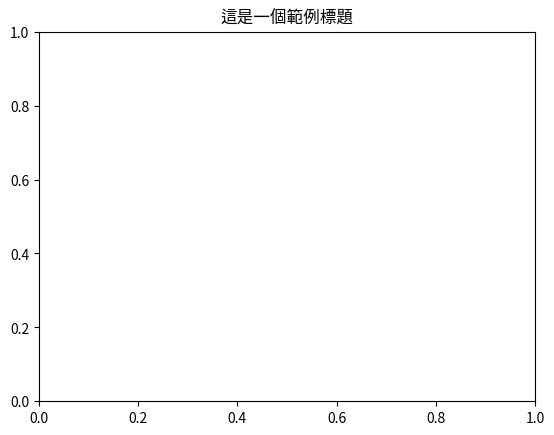

In [30]:
# 繪製範例圖表
plt.title("這是一個範例標題")
plt.show()

In [31]:
# 導入所需的庫
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mplfinance as mpf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [32]:
# 定義要分析的股票代碼
stocks = {
    'TSMC': '2330.TW',
    'Samsung': '005930.KS',
    'Intel': 'INTC'
}

# 設定時間範圍
start_date = '2024-01-01'
end_date = '2024-09-26'

# 下載股票資料
data = {}
for company, ticker in stocks.items():
    data[company] = yf.download(ticker, start=start_date, end=end_date)

# 檢查數據
for company, df in data.items():
    print(f"{company} 數據概覽：")
    print(df.head())
    print("\n")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TSMC 數據概覽：
             Open   High    Low  Close   Adj Close    Volume
Date                                                        
2024-01-02  590.0  593.0  589.0  593.0  585.360962  26059058
2024-01-03  584.0  585.0  576.0  578.0  570.554199  37106763
2024-01-04  580.0  581.0  577.0  580.0  572.528442  15309129
2024-01-05  578.0  580.0  574.0  576.0  568.579956  18158971
2024-01-08  582.0  585.0  579.0  583.0  575.489746  17761275


Samsung 數據概覽：
               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2024-01-02  78200.0  79800.0  78200.0  79600.0  78888.054688  17142847
2024-01-03  78500.0  78800.0  77000.0  77000.0  76311.304688  21753644
2024-01-04  76100.0  77300.0  76100.0  76600.0  75914.882812  15324439
2024-01-05  76700.0  77100.0  76400.0  76600.0  75914.882812  11304316
2024-01-08  77000.0  77500.0  76400.0  76500.0  75815.781250  11088724


Intel 數據概覽：
                 Open       High   

In [33]:
def calculate_technical_indicators(df):
    # 計算 SMA
    df['SMA_5'] = df['Close'].rolling(window=5).mean()
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_60'] = df['Close'].rolling(window=60).mean()

    # 計算 RSI
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # 計算 MACD
    exp1 = df['Close'].ewm(span=12, adjust=False).mean()
    exp2 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp1 - exp2
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    return df

# 為每個公司計算技術指標
for company in data:
    data[company] = calculate_technical_indicators(data[company])

    # 創建目標變數：1代表股價上漲，0代表下跌或不變
    data[company]['Target'] = (data[company]['Close'].shift(-1) > data[company]['Close']).astype(int)

    # 移除含有 NaN 的行
    data[company].dropna(inplace=True)

# 檢查計算後的數據
for company, df in data.items():
    print(f"{company} 計算技術指標後的數據概覽：")
    print(df.tail())
    print("\n")

TSMC 計算技術指標後的數據概覽：
              Open    High    Low   Close  Adj Close    Volume  SMA_5  SMA_20  \
Date                                                                            
2024-09-19   940.0   960.0  936.0   960.0      960.0  32739630  947.0  933.95   
2024-09-20   981.0   982.0  971.0   973.0      973.0  60133709  953.6  935.05   
2024-09-23   971.0   977.0  971.0   977.0      977.0  14497067  959.6  936.45   
2024-09-24   976.0   987.0  971.0   987.0      987.0  26785975  967.6  938.30   
2024-09-25  1000.0  1005.0  998.0  1005.0     1005.0  39405222  980.4  941.45   

                SMA_60        RSI       MACD  Signal_Line  Target  
Date                                                               
2024-09-19  956.333333  54.450262  -0.864535    -5.277958       1  
2024-09-20  956.800000  57.142857   2.187009    -3.784964       1  
2024-09-23  957.083333  57.142857   4.871985    -2.053574       1  
2024-09-24  957.533333  61.463415   7.717799    -0.099300       1  
2024-

<ipython-input-34-7fae5e9bf2a6>:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


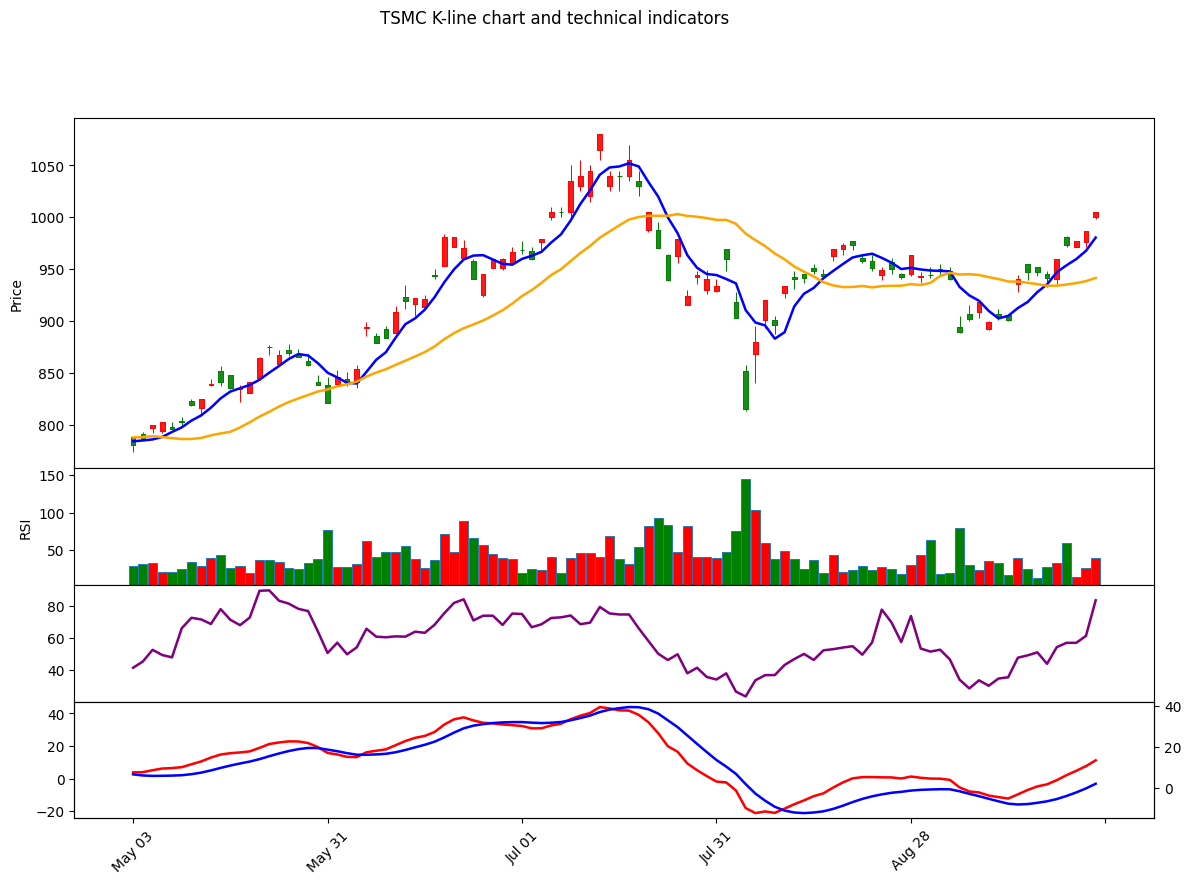

<ipython-input-34-7fae5e9bf2a6>:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


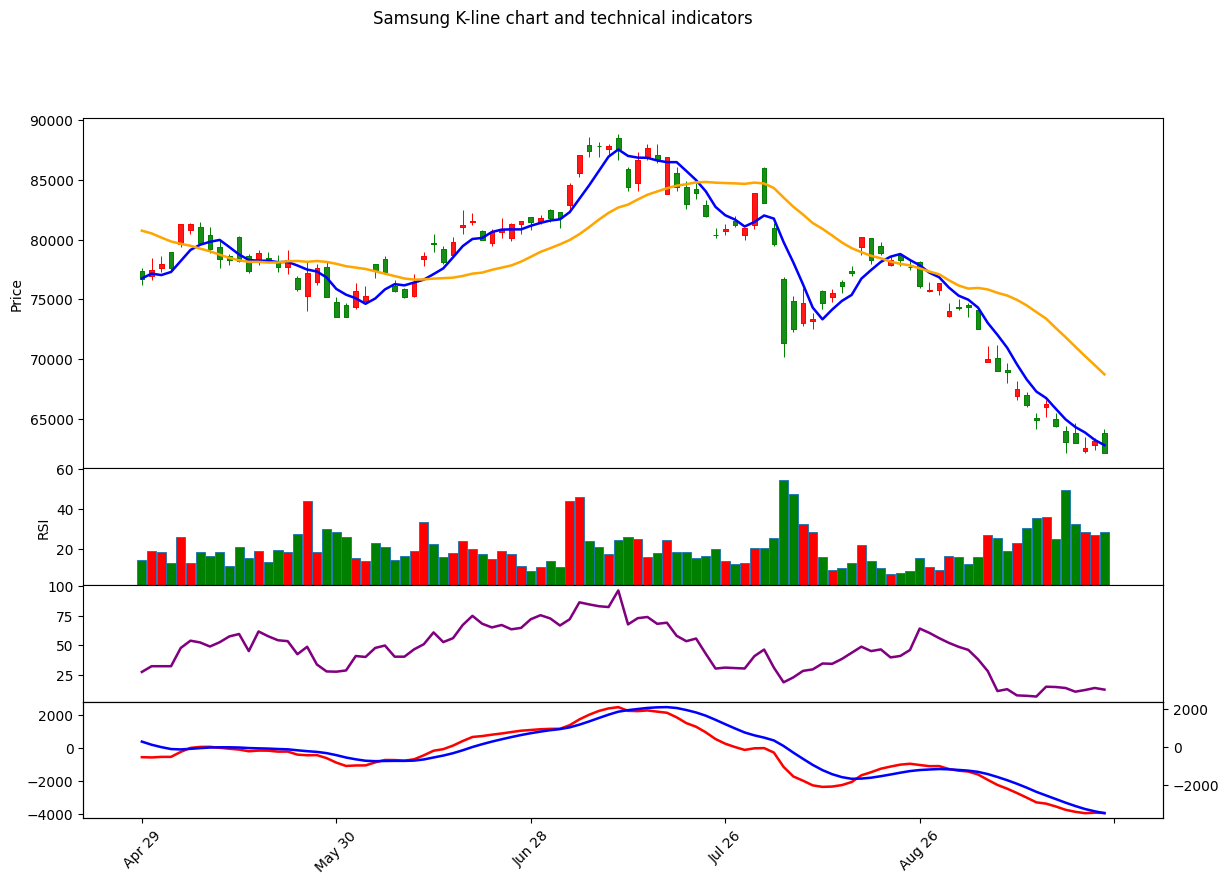

<ipython-input-34-7fae5e9bf2a6>:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


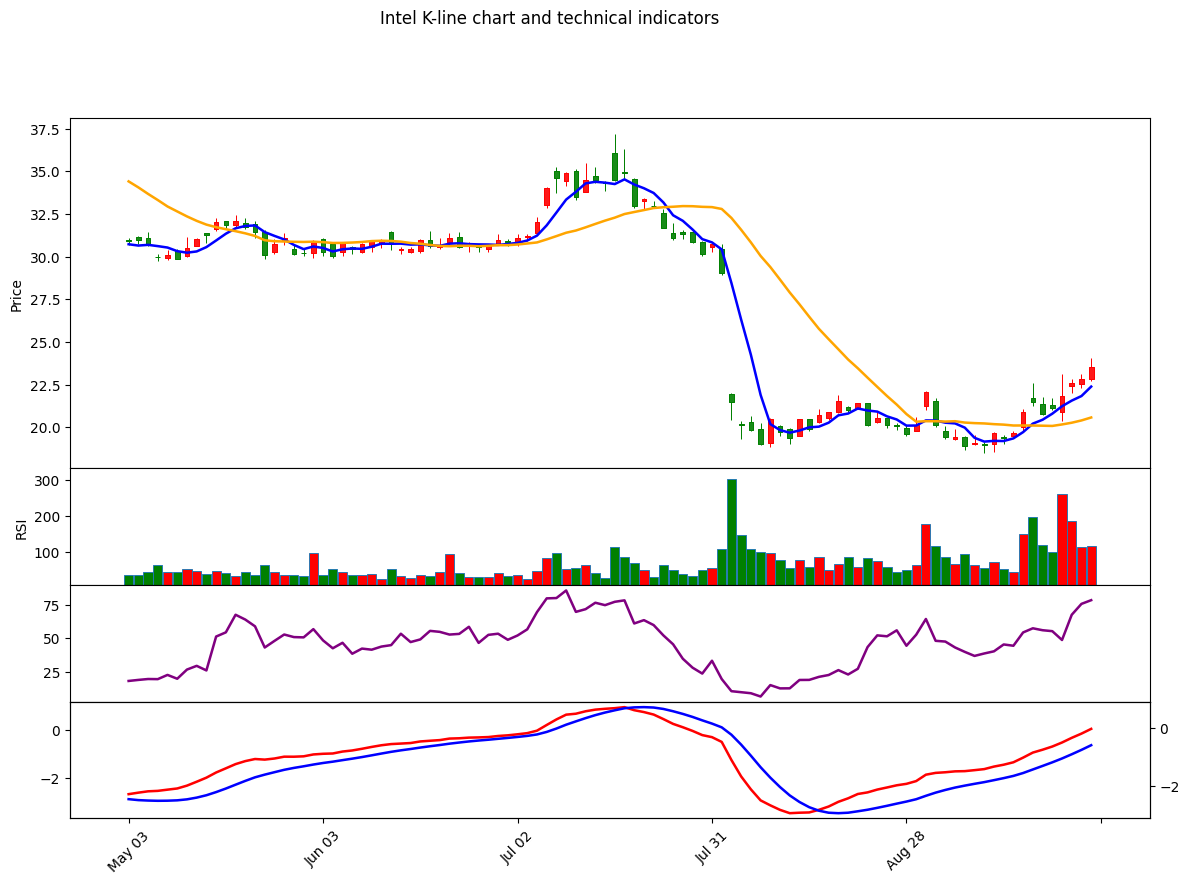

In [34]:
def plot_candlestick_chart(company, df, start_date=None, end_date=None):
    # 如果沒有指定日期範圍，使用最後100個交易日
    if start_date is None or end_date is None:
        df = df.iloc[-100:]
    else:
        df = df.loc[start_date:end_date]

    # 設置 mpf 樣式
    mc = mpf.make_marketcolors(up='r', down='g', inherit=True)
    s = mpf.make_mpf_style(marketcolors=mc)

    # 添加技術指標
    add_plot = [
        mpf.make_addplot(df['SMA_5'], color='blue'),
        mpf.make_addplot(df['SMA_20'], color='orange'),
        mpf.make_addplot(df['RSI'], panel=2, color='purple'),
        mpf.make_addplot(df['MACD'], panel=3, color='red'),
        mpf.make_addplot(df['Signal_Line'], panel=3, color='blue')
    ]

    # 繪製 K 線圖
    fig, axes = mpf.plot(df, type='candle', style=s, addplot=add_plot,
                         title=f'{company} K-line chart and technical indicators',
                         ylabel='Price',
                         volume=True,
                         figsize=(15, 10),
                         panel_ratios=(6,2,2,2),
                         returnfig=True)

    # 手動設置 y 軸標籤
    axes[0].set_ylabel('Price')
    axes[2].set_ylabel('RSI')
    axes[3].set_ylabel('MACD')

    # 在 RSI 面板上添加過買過賣線
    axes[2].axhline(70, color='r', linestyle='--', alpha=0.5)
    axes[2].axhline(30, color='g', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# 為每個公司繪製 K 線圖
for company, df in data.items():
    plot_candlestick_chart(company, df)

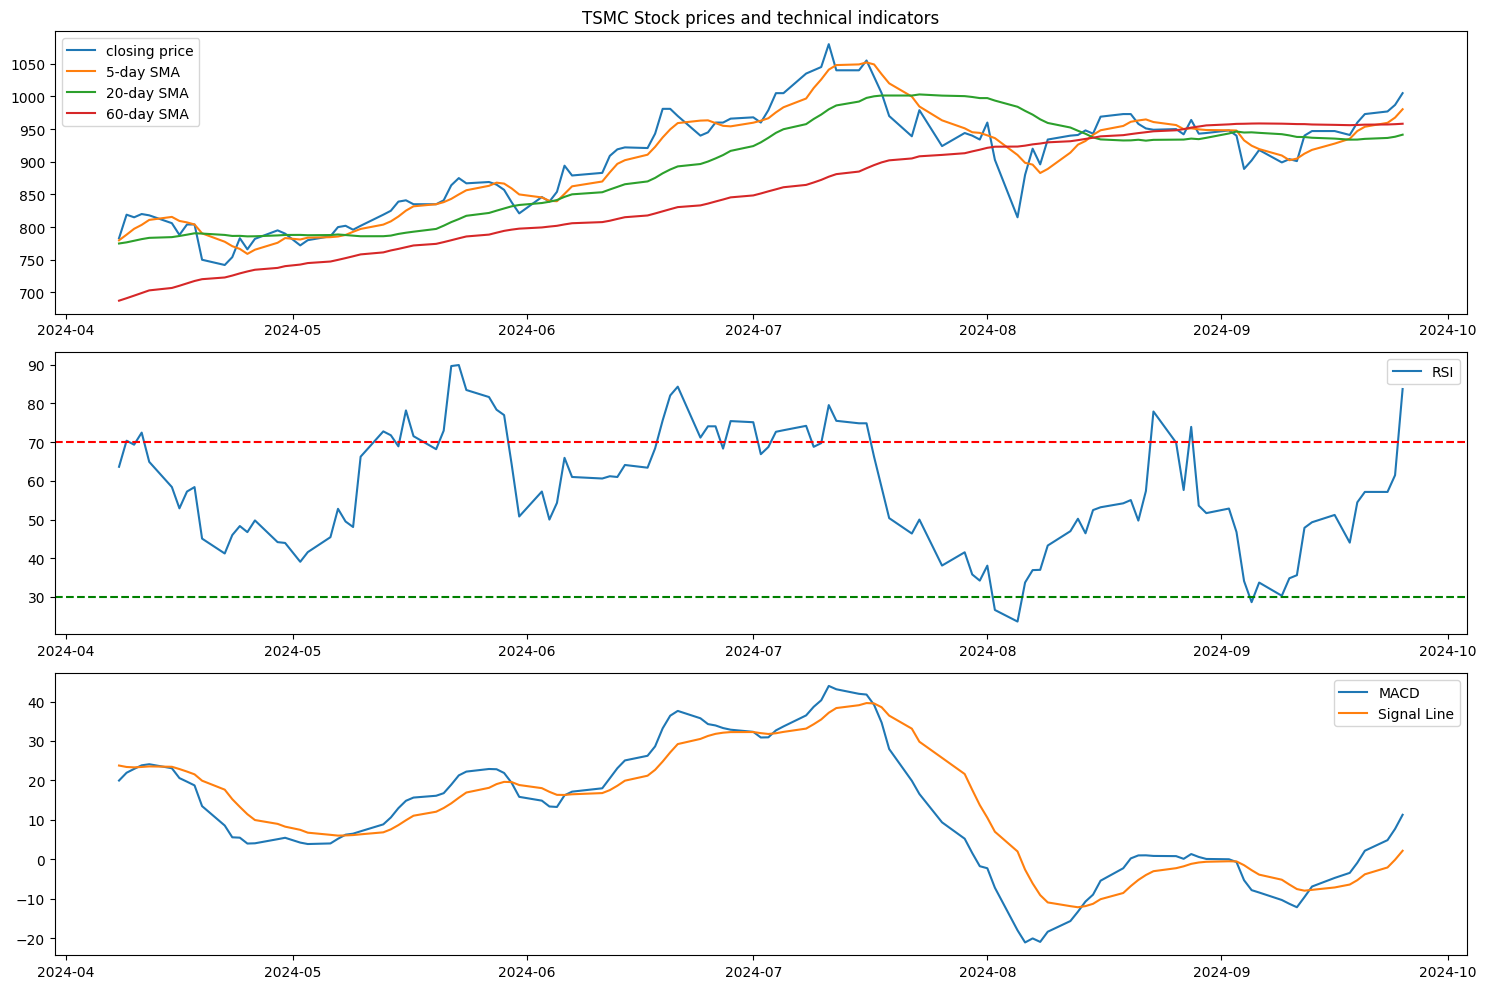

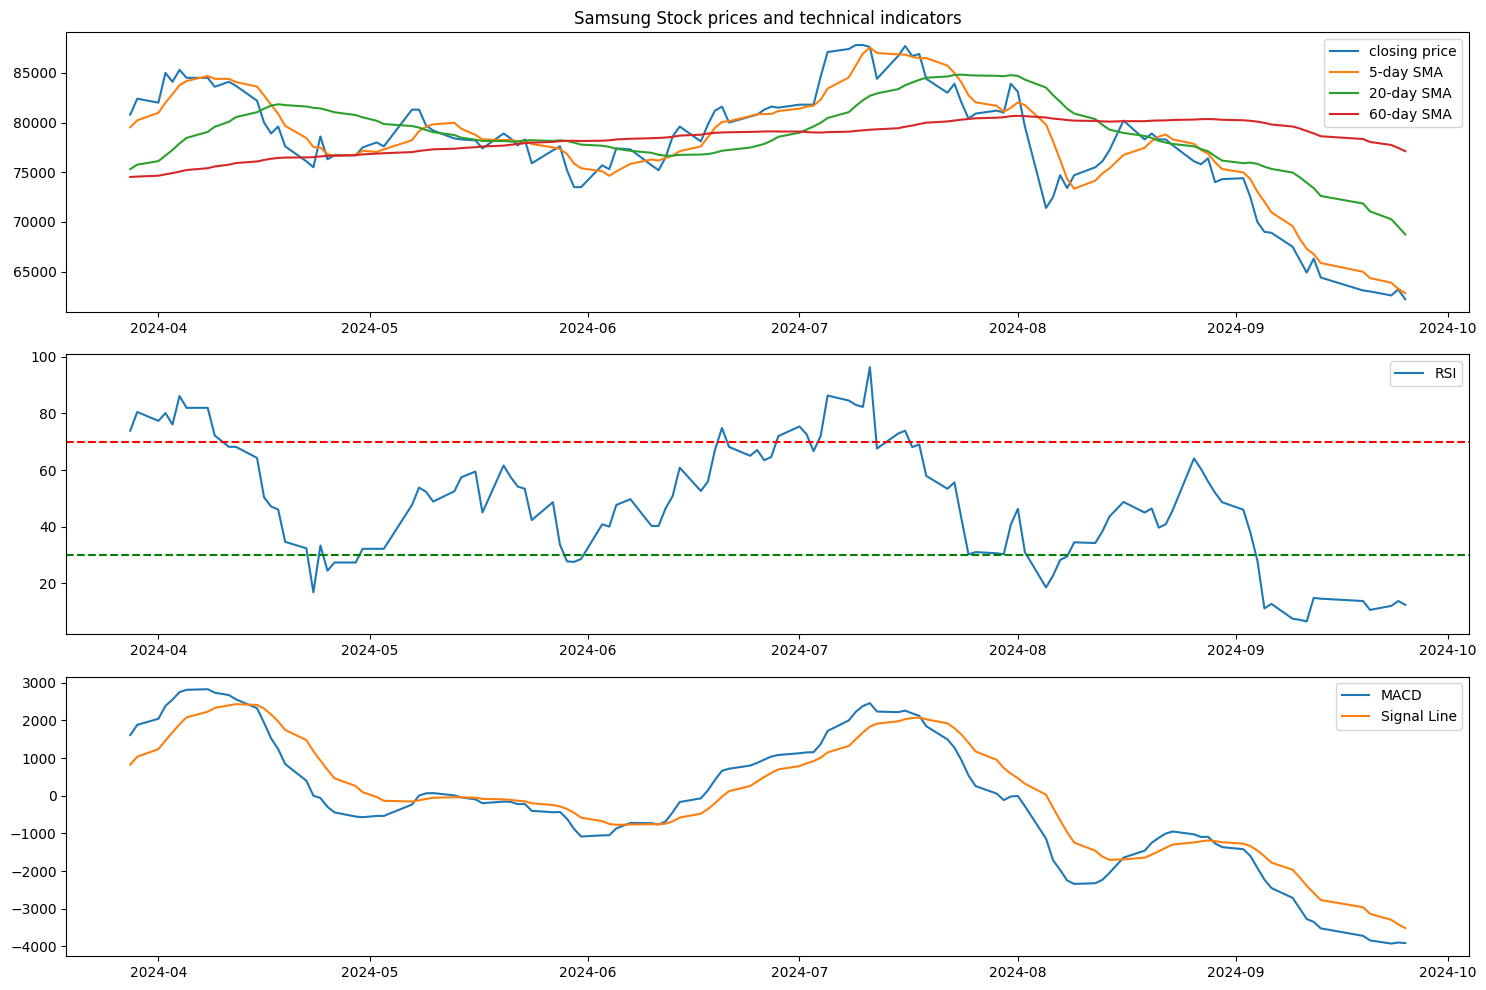

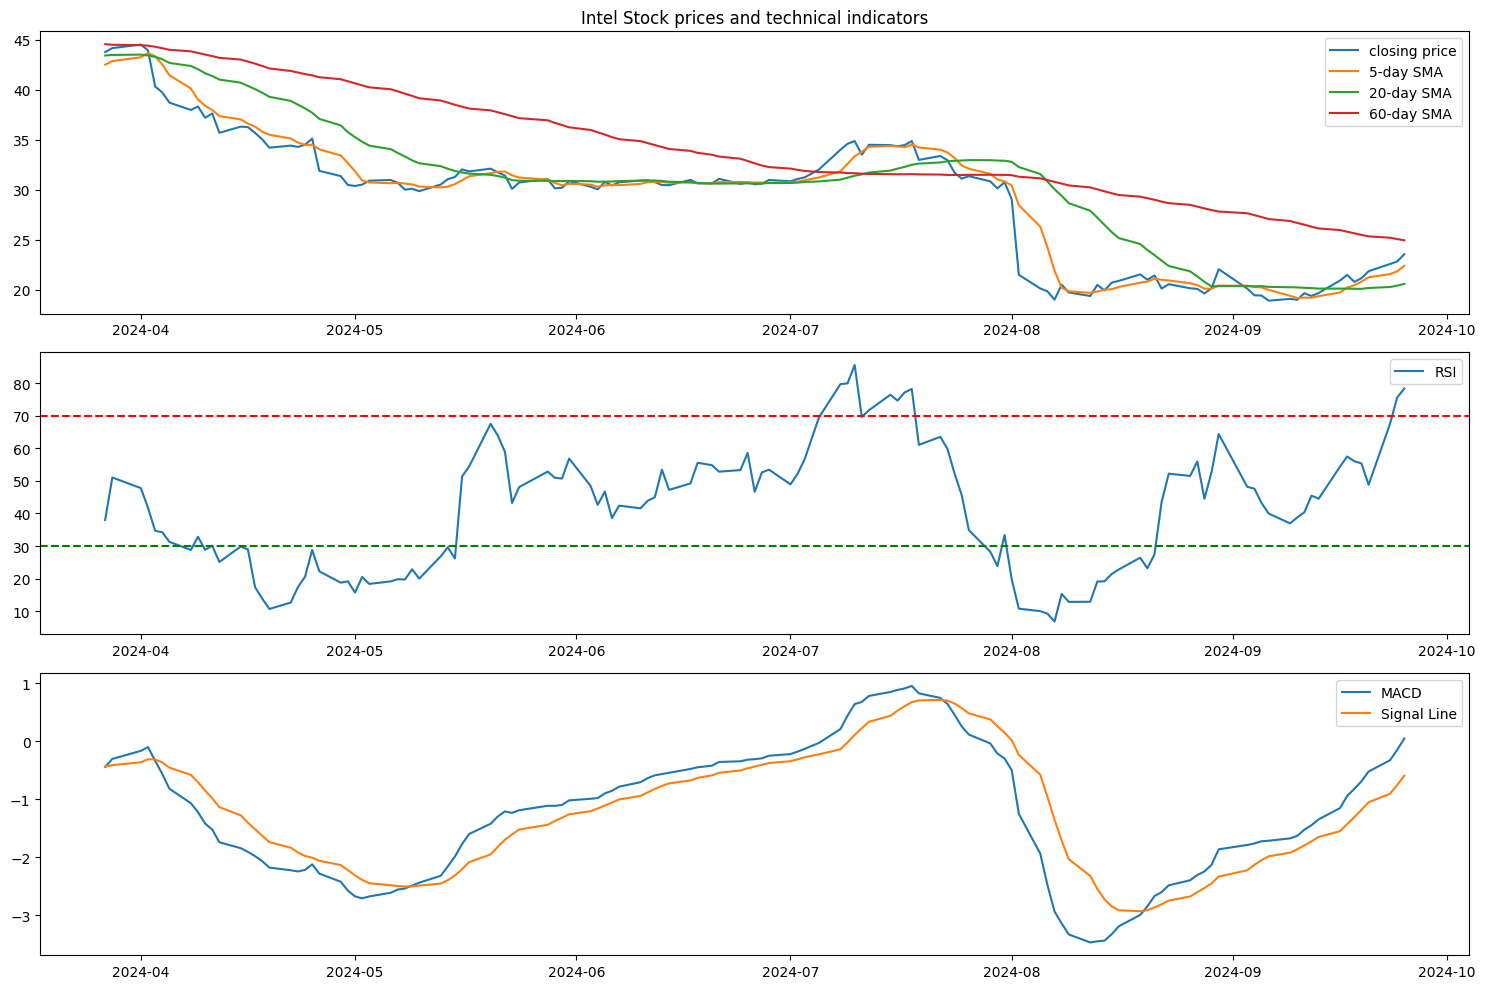

In [35]:
def plot_stock_data(company, df):
    plt.figure(figsize=(15, 10))
    plt.subplot(311)
    plt.title(f"{company} Stock prices and technical indicators")
    plt.plot(df.index, df['Close'], label='closing price')
    plt.plot(df.index, df['SMA_5'], label='5-day SMA')
    plt.plot(df.index, df['SMA_20'], label='20-day SMA')
    plt.plot(df.index, df['SMA_60'], label='60-day SMA')
    plt.legend()

    plt.subplot(312)
    plt.plot(df.index, df['RSI'], label='RSI')
    plt.axhline(y=70, color='r', linestyle='--')
    plt.axhline(y=30, color='g', linestyle='--')
    plt.legend()

    plt.subplot(313)
    plt.plot(df.index, df['MACD'], label='MACD')
    plt.plot(df.index, df['Signal_Line'], label='Signal Line')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 為每個公司繪製圖表
for company, df in data.items():
    plot_stock_data(company, df)

In [36]:
def prepare_data(df):
    features = ['SMA_5', 'SMA_20', 'SMA_60', 'RSI', 'MACD', 'Signal_Line']
    X = df[features]
    y = df['Target']

    # 數據標準化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 分割訓練集和測試集
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    return X_train, X_test, y_train, y_test

# 準備每個公司的數據
prepared_data = {}
for company, df in data.items():
    prepared_data[company] = prepare_data(df)

print("數據準備完成。")

數據準備完成。


In [37]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # 訓練模型
    model.fit(X_train, y_train)

    # 預測
    y_pred = model.predict(X_test)

    # 評估模型
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy, precision, recall, f1, y_pred

# 定義模型
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# 訓練和評估每個公司的每個模型
results = {}
for company, (X_train, X_test, y_train, y_test) in prepared_data.items():
    results[company] = {}
    for model_name, model in models.items():
        accuracy, precision, recall, f1, y_pred = train_and_evaluate_model(model, X_train, X_test, y_train, y_test)
        results[company][model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Predictions': y_pred
        }

# 顯示結果
for company in results:
    print(f"\n{company} 結果：")
    for model in results[company]:
        print(f"  {model}:")
        for metric, value in results[company][model].items():
            if metric != 'Predictions':
                print(f"    {metric}: {value:.4f}")


TSMC 結果：
  Logistic Regression:
    Accuracy: 0.5833
    Precision: 0.7222
    Recall: 0.5652
    F1 Score: 0.6341
  Decision Tree:
    Accuracy: 0.5000
    Precision: 0.6471
    Recall: 0.4783
    F1 Score: 0.5500
  Random Forest:
    Accuracy: 0.5833
    Precision: 0.6667
    Recall: 0.6957
    F1 Score: 0.6809

Samsung 結果：
  Logistic Regression:
    Accuracy: 0.5946
    Precision: 0.3333
    Recall: 0.2500
    F1 Score: 0.2857
  Decision Tree:
    Accuracy: 0.4865
    Precision: 0.2667
    Recall: 0.3333
    F1 Score: 0.2963
  Random Forest:
    Accuracy: 0.5405
    Precision: 0.3077
    Recall: 0.3333
    F1 Score: 0.3200

Intel 結果：
  Logistic Regression:
    Accuracy: 0.4211
    Precision: 0.6667
    Recall: 0.1667
    F1 Score: 0.2667
  Decision Tree:
    Accuracy: 0.5000
    Precision: 0.7778
    Recall: 0.2917
    F1 Score: 0.4242
  Random Forest:
    Accuracy: 0.5000
    Precision: 0.7778
    Recall: 0.2917
    F1 Score: 0.4242


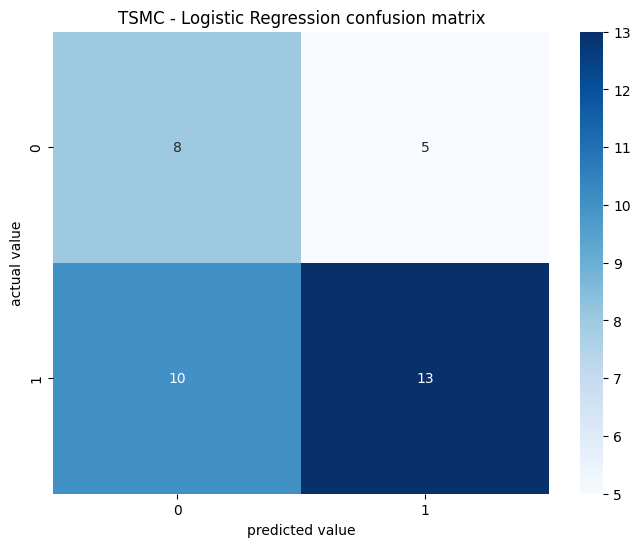

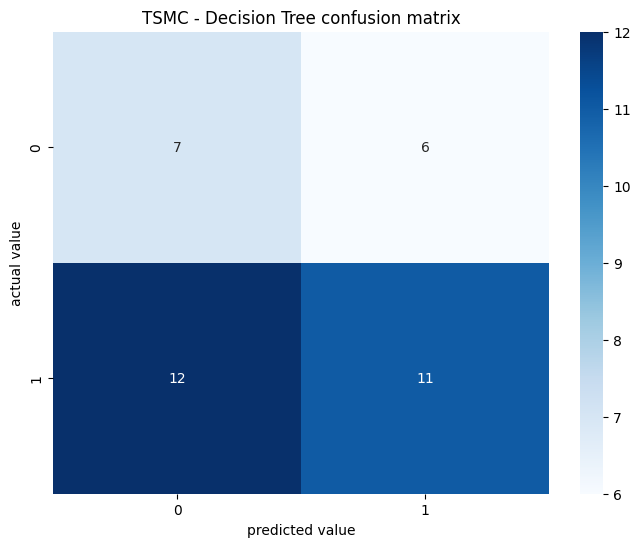

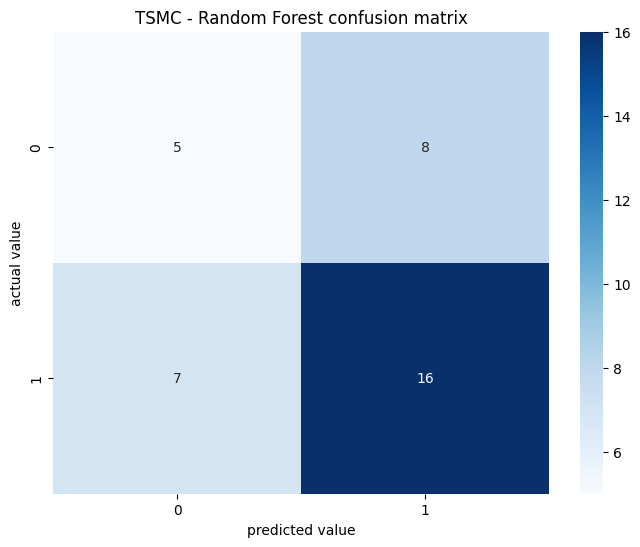

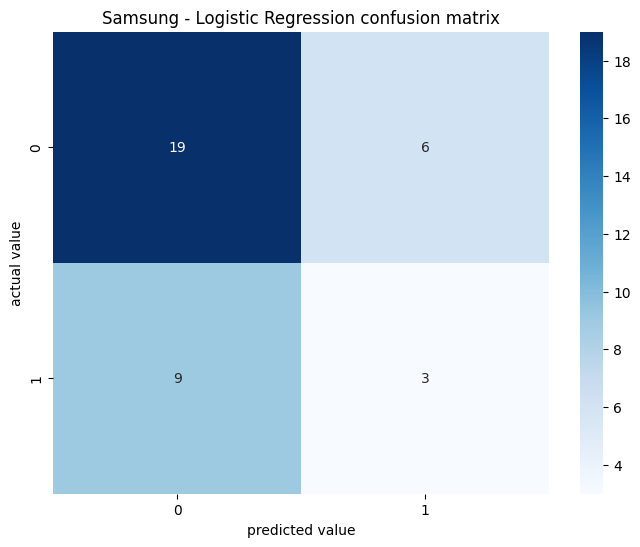

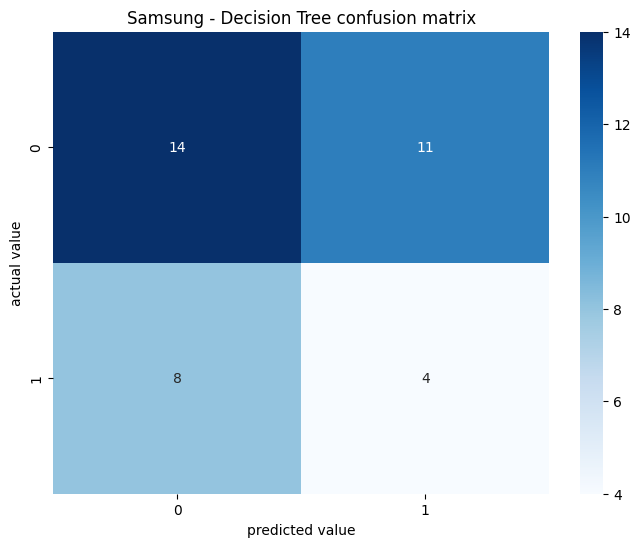

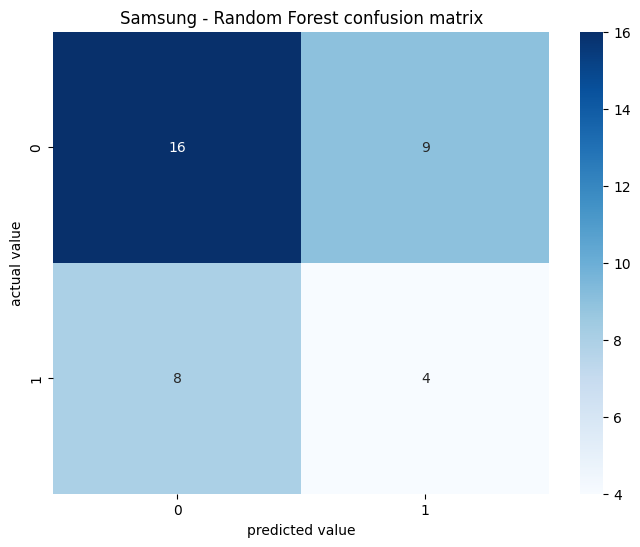

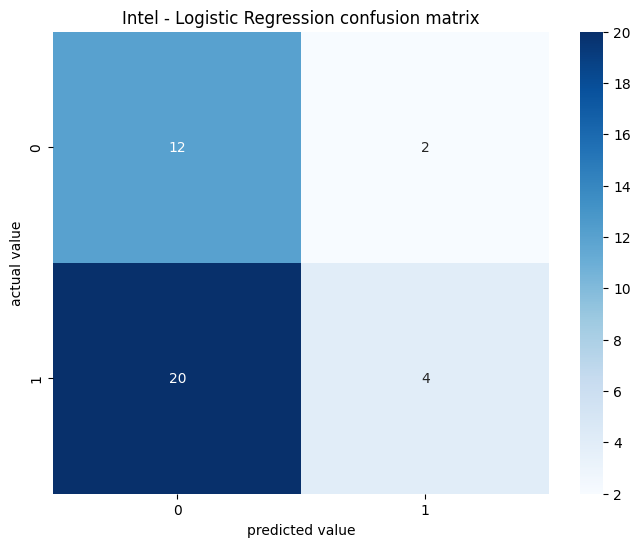

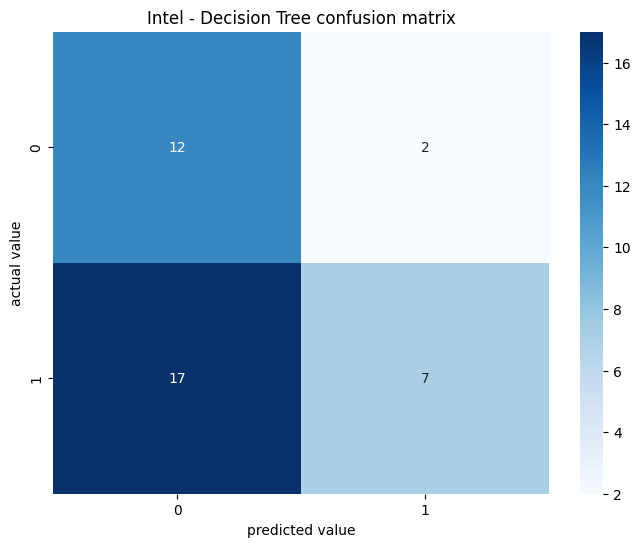

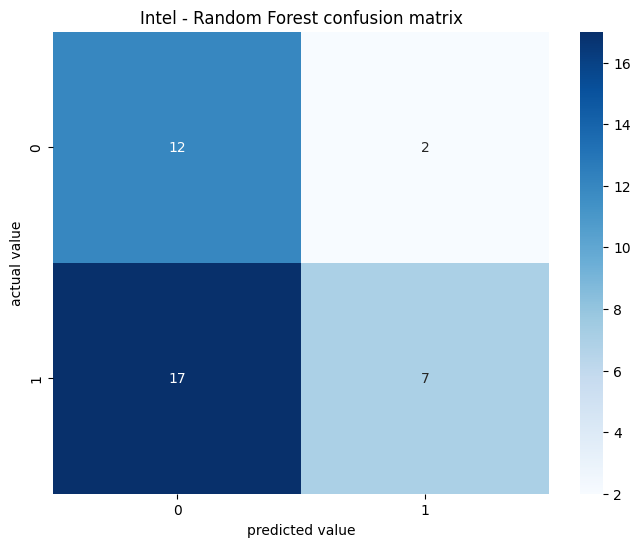

In [38]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('actual value')
    plt.xlabel('predicted value')
    plt.show()

# 為每個公司的每個模型繪製混淆矩陣
for company, company_results in results.items():
    for model_name, model_results in company_results.items():
        y_test = prepared_data[company][3]  # y_test
        y_pred = model_results['Predictions']
        plot_confusion_matrix(y_test, y_pred, f"{company} - {model_name} confusion matrix")

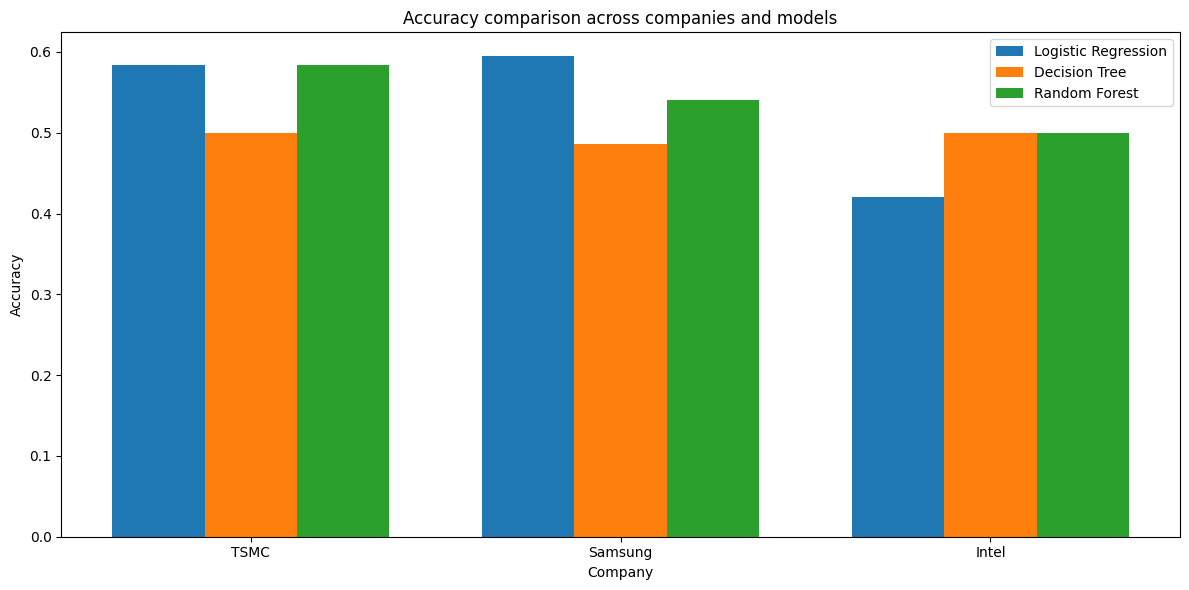

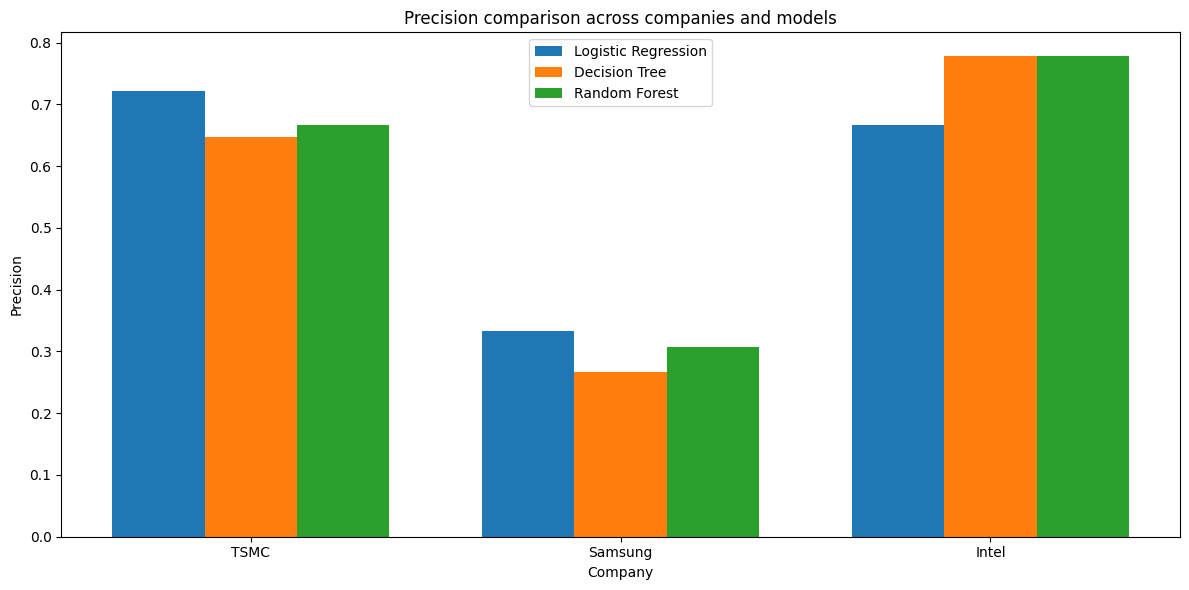

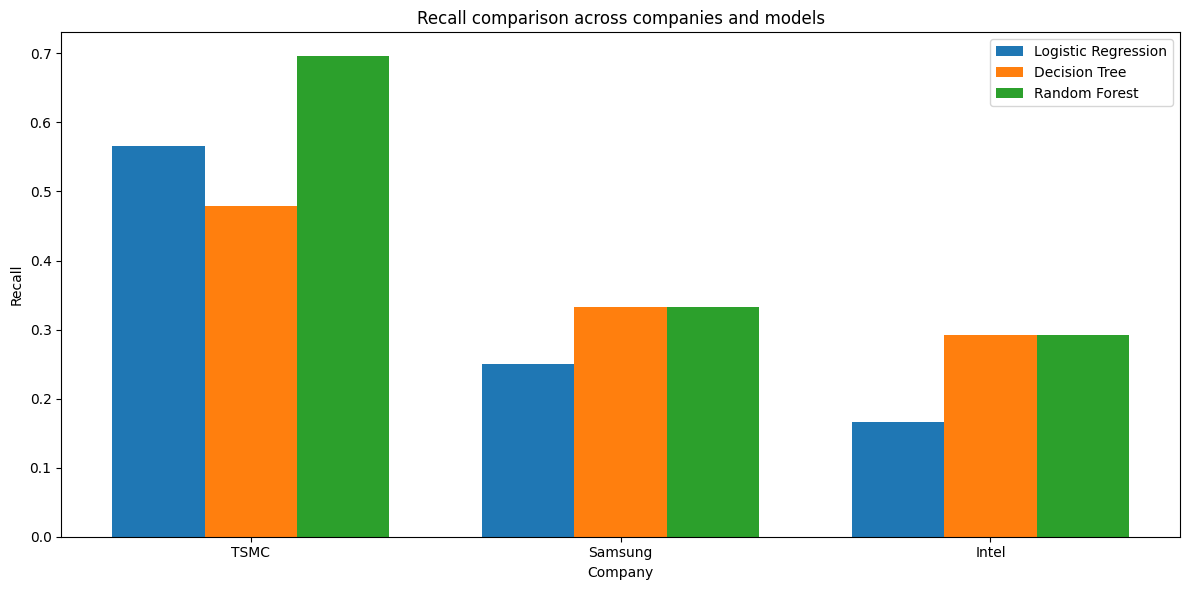

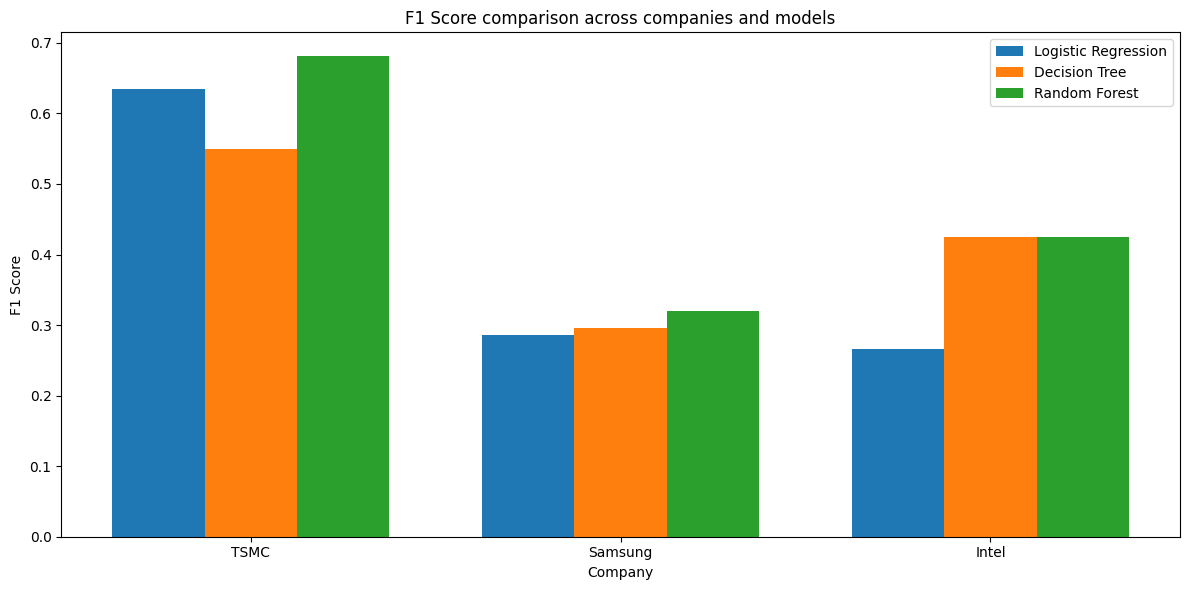

In [39]:
# 比較不同公司和模型的表現
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
companies = list(results.keys())
model_names = list(models.keys())

for metric in metrics:
    plt.figure(figsize=(12, 6))
    x = np.arange(len(companies))
    width = 0.25

    for i, model_name in enumerate(model_names):
        values = [results[company][model_name][metric] for company in companies]
        plt.bar(x + i*width, values, width, label=model_name)

    plt.xlabel('Company')
    plt.ylabel(metric)
    plt.title(f'{metric} comparison across companies and models')
    plt.xticks(x + width, companies)
    plt.legend()
    plt.tight_layout()
    plt.show()